# Data Visualization
### Activity 2 - Exploratory Data Analysis I
Exploratory analysis of the data to understand each variable <br>

24th November 2023 <br> Fall 2023

---
### **Group 36:**
Tomás Bensimon - 43022 <br>
Cristina Tiago - 58636 <br>
Martim Esteves - 46953 <br>

---

### Imports & Setup

In [11]:
import os
path = os.path.join(os.getcwd(), 'Datasets\\Raw')

import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_rows', 500)

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Color Setup

color_pallete1 = ["#15291C", "#5E5361", "#A697B0", "#EBE9EC",
                 "#97B9C0"]
color_pallete2 = ["#edf8fb", "#b3cde3", "#8c96c6", "#8856a7",
                 "#810f7c"]
sns.set_style("dark")
display(sns.color_palette(color_pallete1))
display(sns.color_palette(color_pallete2))
sns.set_palette(sns.color_palette(color_pallete1))

[(0.08235294117647059, 0.1607843137254902, 0.10980392156862745),
 (0.3686274509803922, 0.3254901960784314, 0.3803921568627451),
 (0.6509803921568628, 0.592156862745098, 0.6901960784313725),
 (0.9215686274509803, 0.9137254901960784, 0.9254901960784314),
 (0.592156862745098, 0.7254901960784313, 0.7529411764705882)]

[(0.9294117647058824, 0.9725490196078431, 0.984313725490196),
 (0.7019607843137254, 0.803921568627451, 0.8901960784313725),
 (0.5490196078431373, 0.5882352941176471, 0.7764705882352941),
 (0.5333333333333333, 0.33725490196078434, 0.6549019607843137),
 (0.5058823529411764, 0.058823529411764705, 0.48627450980392156)]

In [17]:
athlete_events = pd.read_csv(os.path.join(path, 'athlete_events.csv'))
display(athlete_events.head(5))
country_definitions = pd.read_csv(os.path.join(path, 'country_definitions.csv'))
display(country_definitions.head(5))
gdp = pd.read_csv(os.path.join(path, 'gdp_csv.csv'))
display(gdp.head(5))
population = pd.read_csv(os.path.join(path, 'population.csv'))
display(population.head(5))
country_codes = pd.read_csv(os.path.join(path, 'country_codes.csv'), header=[0, 1], index_col=0)
display(country_codes.head(5))

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.00,180.00,80.00,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.00,170.00,60.00,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.00,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.00,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.00,185.00,82.00,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,25760683041.09
1,Arab World,ARB,1969,28434203615.48
2,Arab World,ARB,1970,31385499664.07
3,Arab World,ARB,1971,36426909888.39
4,Arab World,ARB,1972,43316056615.46


,geo,name,time,Population
0,afg,Afghanistan,1800,3280000.00
1,afg,Afghanistan,1801,3280000.00
2,afg,Afghanistan,1802,3280000.00
3,afg,Afghanistan,1803,3280000.00
4,afg,Afghanistan,1804,3280000.00


Current and Historical Countries and Areas of Interest  \
                                                    Code   
0                                        Afghanistan       
1                                      Åland Islands       
2                                            Albania       
3                                            Algeria       
4                                     American Samoa       

                                                        Period of Validity  \
  Countries and Areas of Interest Num-3 Alpha-2 Alpha-3              Start   
0                               4    AF     AFG    1970                NaN   
1                             248    AX     ALA    2004                NaN   
2                               8    AL     ALB    1970                NaN   
3                              12    DZ     DZA    1970                NaN   
4                              16    AS     ASM    1970                NaN   

                                        Remarks  
                         End Unnamed: 8_level_1  
0                        NaN                NaN  
1  Formerly part of Finland.                NaN  
2                        NaN                NaN  
3                        NaN                NaN  
4                        NaN                NaN

---
### General Data Exploration

In [5]:
print('Athlete Events - ', athlete_events.shape[0], 'rows and', athlete_events.shape[1], 'columns')
print('Country Definitions - ', country_definitions.shape[0], 'rows and', country_definitions.shape[1], 'columns')
print('GDP - ', gdp.shape[0], 'rows and', gdp.shape[1], 'columns')
print('Population - ', population.shape[0], 'rows and', population.shape[1], 'columns')

Athlete Events -  271116 rows and 15 columns
Country Definitions -  230 rows and 3 columns
GDP -  11507 rows and 4 columns
Population -  59297 rows and 4 columns


In [6]:
for column in athlete_events.columns:
    print(column, '-', athlete_events[column].dtype)

ID - int64
Name - object
Sex - object
Age - float64
Height - float64
Weight - float64
Team - object
NOC - object
Games - object
Year - int64
Season - object
City - object
Sport - object
Event - object
Medal - object


In [7]:
for column in gdp.columns:
    print(column, '-', gdp[column].dtype)

Country Name - object
Country Code - object
Year - int64
Value - float64


In [8]:
for column in population.columns:
    print(column, '-', population[column].dtype)

geo - object
name - object
time - int64
Population - float64


---
### Missing Values

In [9]:
for column in athlete_events.columns:
    print(column, '-', athlete_events[column].isna().sum())

ID - 0
Name - 0
Sex - 0
Age - 9474
Height - 60171
Weight - 62875
Team - 0
NOC - 0
Games - 0
Year - 0
Season - 0
City - 0
Sport - 0
Event - 0
Medal - 231333


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event
0,1,A Dijiang,M,24.00,180.00,80.00,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball
1,2,A Lamusi,M,23.00,170.00,60.00,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight
2,3,Gunnar Nielsen Aaby,M,24.00,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football
3,4,Edgar Lindenau Aabye,M,34.00,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War
4,5,Christine Jacoba Aaftink,F,21.00,185.00,82.00,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.00,179.00,89.00,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles
271112,135570,Piotr ya,M,27.00,176.00,59.00,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual"
271113,135570,Piotr ya,M,27.00,176.00,59.00,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team"
271114,135571,Tomasz Ireneusz ya,M,30.00,185.00,96.00,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four


In [39]:
athlete_events.copy().drop(columns = 'Medal').isna().sum(axis=1).value_counts(sort =True).to_frame().columns

Index(['count'], dtype='object')

,count
0,206165
2,50723
3,8423
1,5805


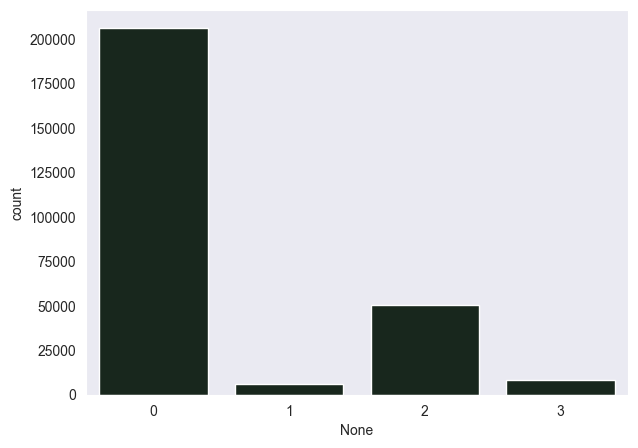

In [44]:
athlete_events_hmissing = athlete_events.copy().drop(columns = 'Medal').isna().sum(axis=1).value_counts(sort =True).to_frame()
display(athlete_events_hmissing)
plt.figure(figsize=(7, 5))
sns.barplot(x=athlete_events_hmissing.index, y='count', data=athlete_events_hmissing)
plt.show()

In [12]:
for column in country_definitions.columns:
    print(column, '-', country_definitions[column].isna().sum())

NOC - 0
region - 3
notes - 209


In [8]:
for column in gdp.columns:
    print(column, '-', gdp[column].isna().sum())

Country Name - 0
Country Code - 0
Year - 0
Value - 0


In [9]:
for column in population.columns:
    print(column, '-', population[column].isna().sum())

geo - 0
name - 0
time - 0
Population - 100


---
### Intermediary Calculations & Plotting
##### Athlete_Events Dataset
- Age
   1. Frequency Distribution: Histogram
   2. Range, Outliers: Box Plot

In [10]:
age_freq = athlete_events['Age'].value_counts().sort_index()
display(age_freq)

Age
10.00      1
11.00     13
12.00     39
13.00    187
14.00    837
        ... 
81.00      2
84.00      1
88.00      3
96.00      1
97.00      1
Name: count, Length: 74, dtype: int64

C:\Users\marti\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\marti\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


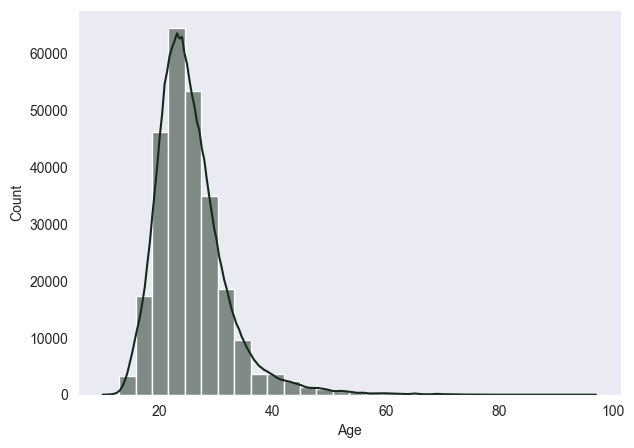

In [11]:
plt.figure(figsize=(7, 5))
sns.histplot(data=athlete_events, x='Age', bins= 30, kde=True)
plt.show()

In [12]:
age_max = athlete_events['Age'].max()
age_min = athlete_events['Age'].min()
age_q1 = athlete_events['Age'].quantile(0.25)
age_q2 = athlete_events['Age'].quantile(0.5)
age_q3 = athlete_events['Age'].quantile(0.75)
age_iqr = age_q3 - age_q1
age_outliers = athlete_events['Age'][(athlete_events['Age']<age_q1-1.5*age_iqr)|(athlete_events['Age']>age_q3+1.5*age_iqr)].count()
print('Max Age:', age_max, '\nMin Age:', age_min, '\nAge Range:', age_max - age_min)
print('Q1:', age_q1, '\nQ2:', age_q2, '\nQ3:', age_q3, '\nIQR:', age_iqr, '\nNumber of Outliers:', age_outliers,
       '({}%)'.format(round((age_outliers/(athlete_events['Age'].notna()).sum())*100,2)))

Max Age: 97.0 
Min Age: 10.0 
Age Range: 87.0
Q1: 21.0 
Q2: 24.0 
Q3: 28.0 
IQR: 7.0 
Number of Outliers: 10317 (3.94%)


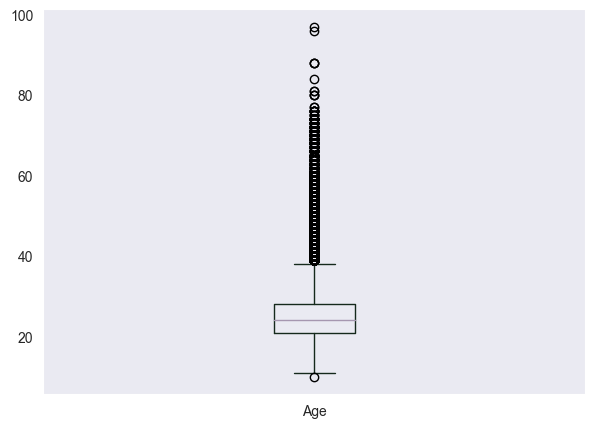

In [13]:
athlete_events['Age'].plot(kind='box', figsize=(7, 5))
plt.show()

##### Country_Definitions Dataset
- Explore different codes for same Region
- Check the notes

In [32]:
country_value_counts = country_definitions.value_counts('region', sort=False)
for region in country_value_counts.index:
    if country_value_counts[region]>1:
        noc_list = list(country_definitions[country_definitions['region']==region]['NOC'].values)
        print(region, '-', noc_list)
        

Australia - ['ANZ', 'AUS']
Canada - ['CAN', 'NFL']
China - ['CHN', 'HKG']
Czech Republic - ['BOH', 'CZE', 'TCH']
Germany - ['FRG', 'GDR', 'GER', 'SAA']
Greece - ['CRT', 'GRE']
Malaysia - ['MAL', 'MAS', 'NBO']
Russia - ['EUN', 'RUS', 'URS']
Serbia - ['SCG', 'SRB', 'YUG']
Syria - ['SYR', 'UAR']
Trinidad - ['TTO', 'WIF']
Vietnam - ['VIE', 'VNM']
Yemen - ['YAR', 'YEM', 'YMD']
Zimbabwe - ['RHO', 'ZIM']


In [35]:
display(country_definitions.dropna(subset=['notes']))

,NOC,region,notes
1,AHO,Curacao,Netherlands Antilles
6,ANT,Antigua,Antigua and Barbuda
7,ANZ,Australia,Australasia
26,BOH,Czech Republic,Bohemia
51,CRT,Greece,Crete
88,HKG,China,Hong Kong
93,IOA,Individual Olympic Athletes,Individual Olympic Athletes
99,ISV,"Virgin Islands, US",Virgin Islands
143,NBO,Malaysia,North Borneo
147,NFL,Canada,Newfoundland


##### Population Dataset
- Time
   1. Range of Values per Country
   2. Number of Years of Data per Country

In [14]:
time_pop_range = pd.DataFrame(population[['name','time']].groupby('name').agg(['min','max','count'])).droplevel(0, axis=1)
display(time_pop_range)

,min,max,count
name,,,
Afghanistan,1800,2100,301
Albania,1800,2100,301
Algeria,1800,2100,301
Andorra,1800,2100,301
Angola,1800,2100,301
...,...,...,...
Venezuela,1800,2100,301
Vietnam,1800,2100,301
Yemen,1800,2100,301


In [15]:
display(time_pop_range['min'].value_counts())
display(time_pop_range['max'].value_counts())
display(time_pop_range['count'].value_counts())

min
1800    197
Name: count, dtype: int64

max
2100    197
Name: count, dtype: int64

count
301    197
Name: count, dtype: int64

- Population
    1. Frequency Distribution (Global): Histogram
    2. Frequency Distribution of Mean Population per Country: Histogram
    2. Range, Outliers (Global & Per Country): Box Plot
###### Note: Intervals for Frequency Distribution chosen based on quantiles

In [16]:
pop_freq_global = population[['name', 'Population']].copy(deep=True)
pop_freq_global['Pop_Interval'] = pd.cut(pop_freq_global['Population'].dropna(), bins=30, include_lowest=True)
display(pop_freq_global.groupby('Pop_Interval').count()[['name']])

C:\Users\marti\AppData\Local\Temp\ipykernel_15796\943500494.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(pop_freq_global.groupby('Pop_Interval').count()[['name']])


,name
Pop_Interval,
"(-1696325.037, 56566518.867]",54634
"(56566518.867, 113132386.733]",2438
"(113132386.733, 169698254.6]",656
"(169698254.6, 226264122.467]",398
"(226264122.467, 282829990.333]",197
"(282829990.333, 339395858.2]",195
"(339395858.2, 395961726.067]",201
"(395961726.067, 452527593.933]",93
"(452527593.933, 509093461.8]",68


C:\Users\marti\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\marti\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


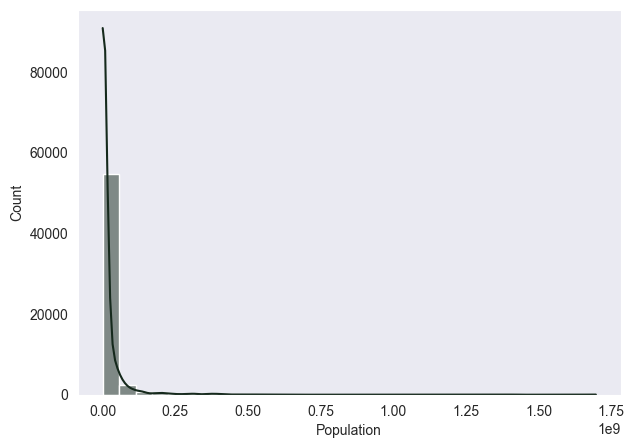

In [17]:
plt.figure(figsize=(7, 5))
sns.histplot(data=population, x='Population', bins=30, kde=True)
plt.show()

In [18]:
pop_freq_means = population[['name', 'Population']].copy(deep=True).groupby('name').mean()
pop_freq_means['Pop_Intervals'] = pd.cut(pop_freq_means['Population'], bins=10, include_lowest=True)
display(pop_freq_means)
print('Max:', pop_freq_means['Population'].max(), '\nMin:', pop_freq_means['Population'].min())
display(pop_freq_means.groupby('Pop_Intervals').count()[['Population']])

,Population,Pop_Intervals
name,,
Afghanistan,28036051.03,"(-754826.574, 75571178.532]"
Albania,1530646.43,"(-754826.574, 75571178.532]"
Algeria,23737653.24,"(-754826.574, 75571178.532]"
Andorra,31688.19,"(-754826.574, 75571178.532]"
Angola,27238505.75,"(-754826.574, 75571178.532]"
...,...,...
Venezuela,14692850.49,"(-754826.574, 75571178.532]"
Vietnam,46879589.81,"(-754826.574, 75571178.532]"
Yemen,20433850.91,"(-754826.574, 75571178.532]"


Max: 755703897.2857143 
Min: 876.4477611940298


C:\Users\marti\AppData\Local\Temp\ipykernel_15796\3071419966.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(pop_freq_means.groupby('Pop_Intervals').count()[['Population']])


,Population
Pop_Intervals,
"(-754826.574, 75571178.532]",186
"(75571178.532, 151141480.615]",8
"(151141480.615, 226711782.699]",1
"(226711782.699, 302282084.783]",0
"(302282084.783, 377852386.867]",0
"(377852386.867, 453422688.951]",0
"(453422688.951, 528992991.034]",0
"(528992991.034, 604563293.118]",0
"(604563293.118, 680133595.202]",0


C:\Users\marti\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\marti\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


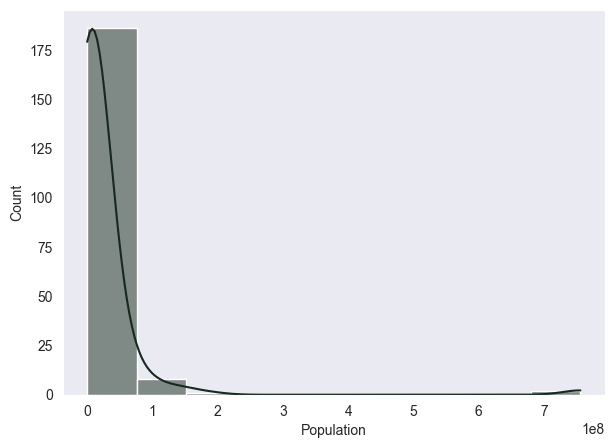

In [19]:
plt.figure(figsize=(7, 5))
sns.histplot(data=pop_freq_means, x='Population', bins=10, kde=True)
plt.show()

In [20]:
pop_max_global = population['Population'].max()
pop_min_global = population['Population'].min()
pop_q1_global = population['Population'].quantile(0.25)
pop_q2_global = population['Population'].quantile(0.5)
pop_q3_global = population['Population'].quantile(0.75)
pop_iqr_global = pop_q3_global - pop_q1_global
pop_outliers_global = population['Population'][(population['Population']<pop_q1_global-1.5*pop_iqr_global)|(population['Population']>pop_q3_global+1.5*pop_iqr_global)].count()
print('Max Time:', pop_max_global, '\nMin Time:', pop_min_global, '\nTime Range:', pop_max_global - pop_min_global)
print('Q1:', pop_q1_global, '\nQ2:', pop_q2_global, '\nQ3:', pop_q3_global, '\nIQR:', pop_iqr_global, '\nNumber of Outliers:', pop_outliers_global,
       '({}%)'.format(round((pop_outliers_global/(population['Population'].notna()).sum())*100,2)))

Max Time: 1696976687.0 
Min Time: 651.0 
Time Range: 1696976036.0
Q1: 434932.0 
Q2: 2633178.0 
Q3: 10969861.0 
IQR: 10534929.0 
Number of Outliers: 8885 (15.01%)


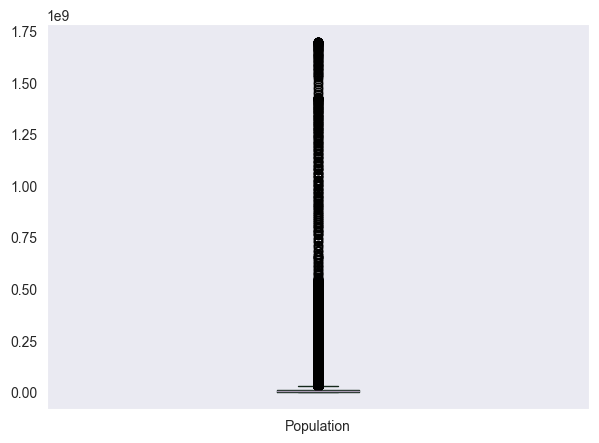

In [21]:
population['Population'].plot(kind='box', figsize=(7, 5))
plt.show()

In [11]:
display(country_definitions)
display(athlete_events)
display(gdp)
display(population)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
...,...,...,...
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.00,180.00,80.00,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.00,170.00,60.00,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.00,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.00,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.00,185.00,82.00,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.00,179.00,89.00,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.00,176.00,59.00,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.00,176.00,59.00,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.00,185.00,96.00,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,25760683041.09
1,Arab World,ARB,1969,28434203615.48
2,Arab World,ARB,1970,31385499664.07
3,Arab World,ARB,1971,36426909888.39
4,Arab World,ARB,1972,43316056615.46
...,...,...,...,...
11502,Zimbabwe,ZWE,2012,14242490252.43
11503,Zimbabwe,ZWE,2013,15451768658.55
11504,Zimbabwe,ZWE,2014,15891049235.99
11505,Zimbabwe,ZWE,2015,16304667807.07


,geo,name,time,Population
0,afg,Afghanistan,1800,3280000.00
1,afg,Afghanistan,1801,3280000.00
2,afg,Afghanistan,1802,3280000.00
3,afg,Afghanistan,1803,3280000.00
4,afg,Afghanistan,1804,3280000.00
...,...,...,...,...
59292,zwe,Zimbabwe,2096,35469605.00
59293,zwe,Zimbabwe,2097,35517791.00
59294,zwe,Zimbabwe,2098,35561279.00
59295,zwe,Zimbabwe,2099,35599779.00


---
### Consistency Checks
- Check if Country Codes 

---
### Color Pallet Test

([<matplotlib.patches.Wedge at 0x284ccbf07d0>,
 [Text(-0.9303751029505434, 0.5868578770109217, 'Summer'),
  Text(0.9303751304233422, -0.5868578334569193, 'Winter')],
 [Text(-0.5074773288821145, 0.3201042965514118, '82.1%'),
  Text(0.5074773438672775, -0.32010427279468323, '17.9%')])

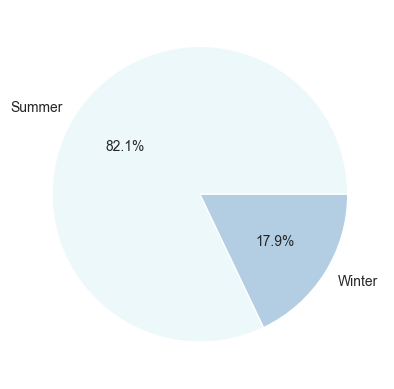

In [6]:
plt.pie(athlete_events.groupby('Season').count()['Name'], labels=['Summer', 'Winter'], autopct='%1.1f%%', colors=color_pallete2)

### Alternative Plots

<Axes: xlabel='Age'>

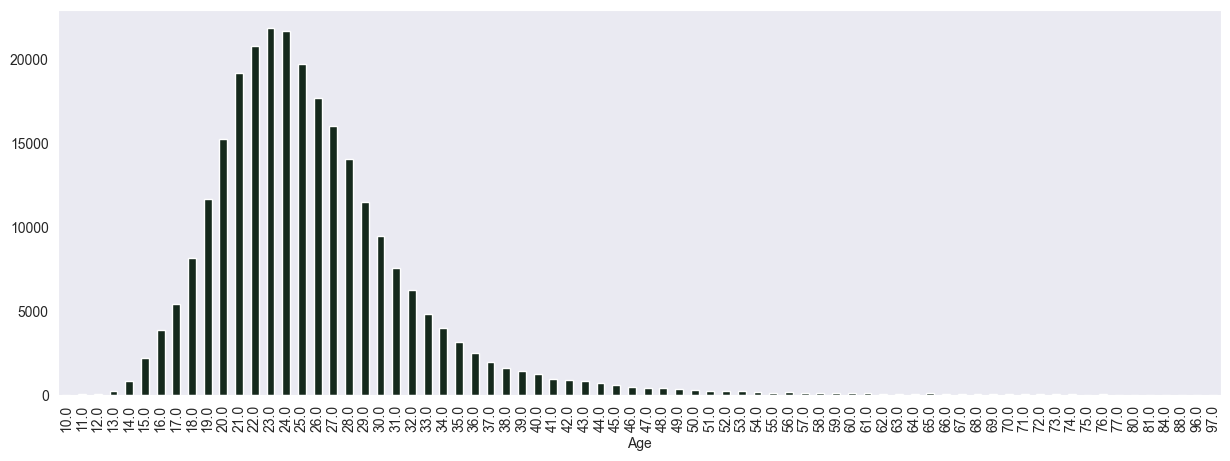

In [24]:
age_freq.plot(kind='bar', figsize=(15, 5))

C:\Users\marti\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


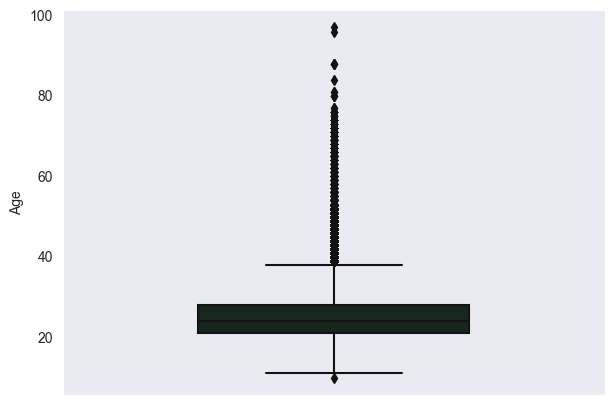

In [25]:
plt.figure(figsize=(7, 5))
sns.boxplot(y=athlete_events['Age'], data=athlete_events, width=0.5)
plt.show()